## **<center>Linear Regression_Predict Medical Charges</center>**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>
  - **4.2** [**Data Information**](#Section42)<br>
  
**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Handling of Missing Data**](#Section51)
  - **5.2** [**Handling of Redundant Data**](#Section52)
  - **5.3** [**Handling of Categorical Data**](#Section53)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Data Preparation**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>


---
<a name = Section1></a>
# **1. Introduction**
---

- Linear regression is a statistical method. This supervised technique is used for modeling and the main goal is to understand the relationship between a dependent and one or more independent variables by fitting a linear equation to the observed data. This relationship can be used to make predictions or understand the impact of the independent variable(s) on the dependent variable.

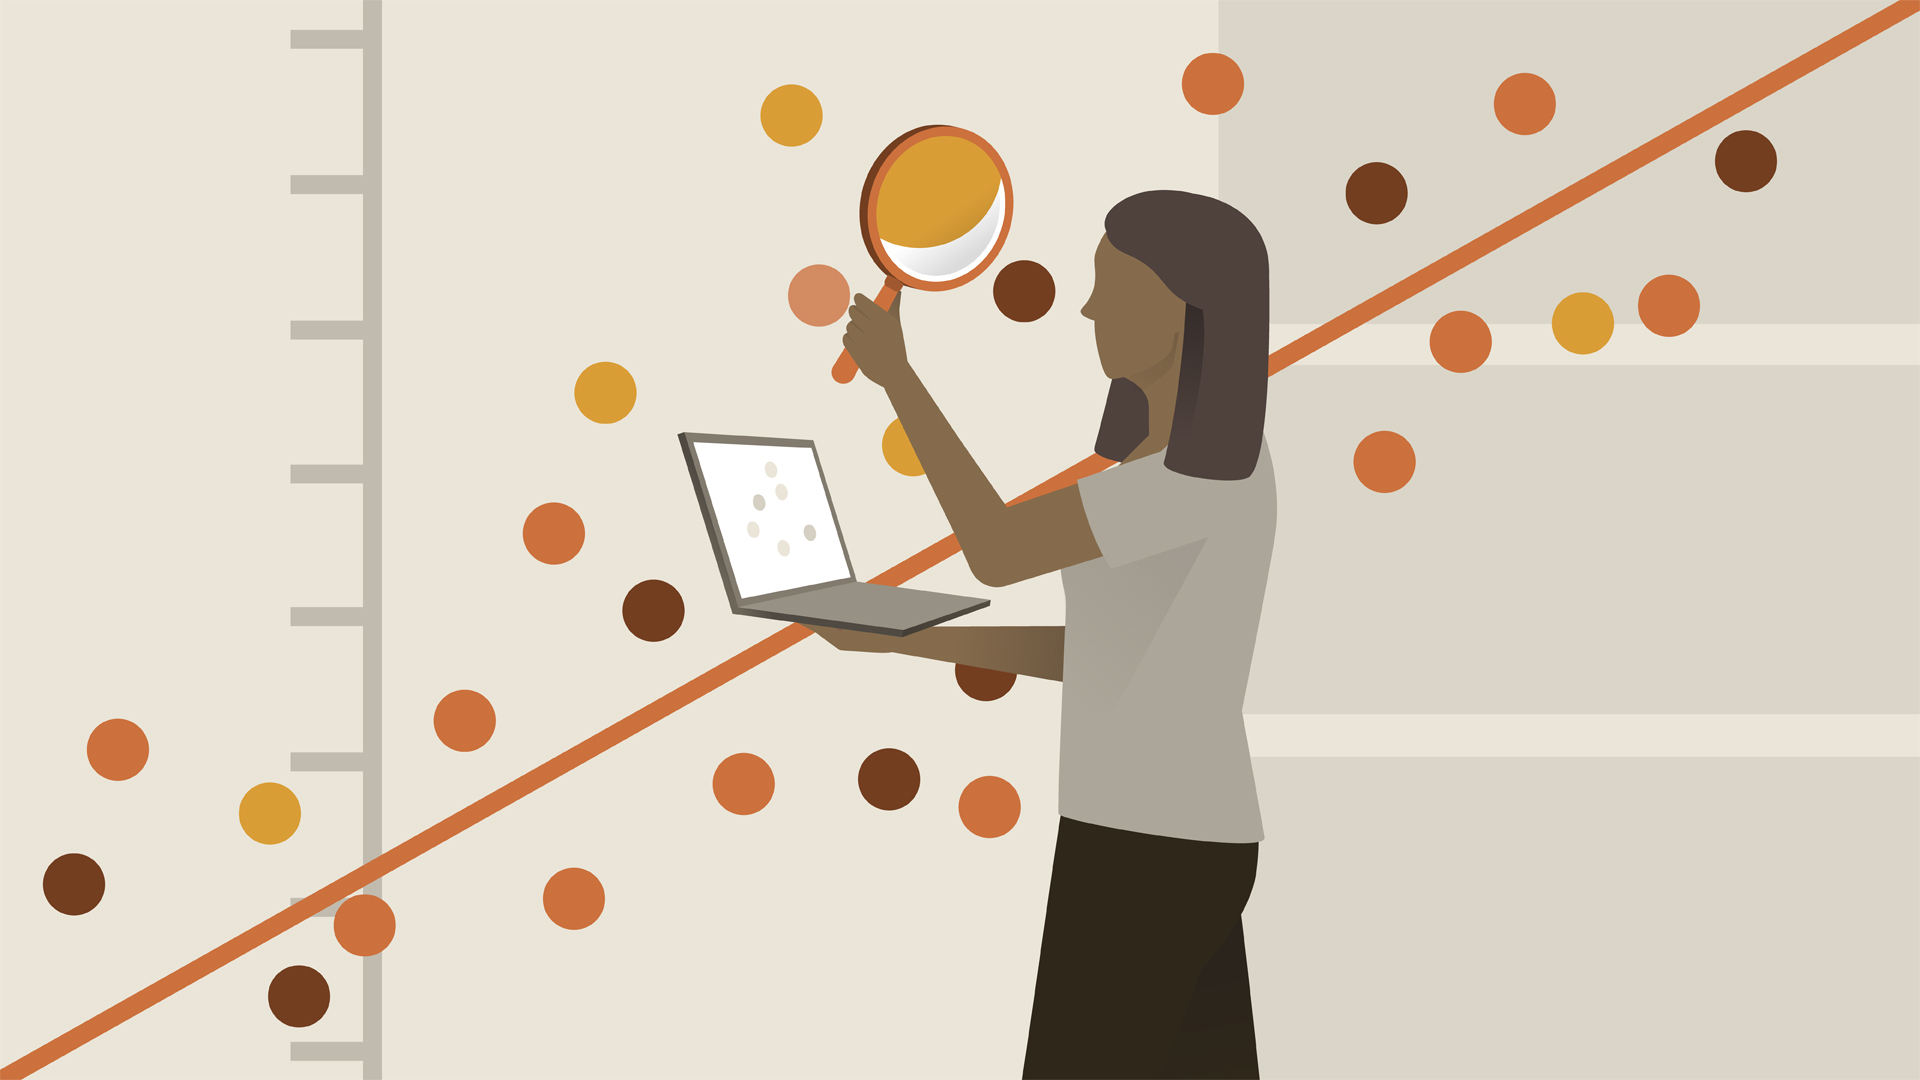

- Linear regression is one of the simplest and most widely used techniques in statistics and in machine learning.

- Linear regression can be denoted by the equation:
<center><h4>$y$= $b0$ + $b1$ * $X$</h4></center>

- For instance, if salary is linearly dependent on number of years of experience, we can predict someone's salary using this equation:

<center><h4>$salary$= $b0$ + $b1$ * $years\_of\_experience$</h4></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

- The profitability of a medical insurance company relies on revenue surpassing expenditures for the healthcare of its policyholders. The challenge arises from the unpredictability of medical costs, primarily driven by rare medical conditions.

- The task is to analyze the company's historical data with the primary objective to develop a regression model for precise medical charge predictions and to evaluate its accuracy.

- Furthermore, identify the key factors influencing medical charges and present a comprehensive analysis of their impact.

---
<a name = Section3></a>
# **3. Importing Libraries**
---

In [1]:
# Importing warning to disable runtime warnings
import warnings
# Warnings will appear only once
warnings.filterwarnings("ignore")
#--------------------------------------------------------------------------------------------------------------------------
# Importing for panel data analysis
import pandas as pd
#--------------------------------------------------------------------------------------------------------------------------
# Importing package numpys (For Numerical Python)
import numpy as np
#--------------------------------------------------------------------------------------------------------------------------
# Importing seaborn library for interactive visualization
import seaborn as sns
#--------------------------------------------------------------------------------------------------------------------------
# Importing pyplot interface of matplotlib
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------------------------------------------------------
# Importing plotly library for visualization
import plotly.graph_objects as go

In [2]:
# To split the data in training and testing part
from sklearn.model_selection import train_test_split 
# Importing Standard Scaler library from preprocessing
from sklearn.preprocessing import StandardScaler
# Importing Linear Regression model
from sklearn.linear_model import LinearRegression 
# To calculate the MSE of a regression model
from sklearn.metrics import mean_squared_error
# To calculate the MAE of a regression model
from sklearn.metrics import mean_absolute_error 
# To calculate the MAPE of a regression model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# To calculate the R-squared score of a regression model
from sklearn.metrics import r2_score                                              

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- This data set is taken from the **cancer.gov and the US Census American Community Survey** for the purpose of **analysis** and **prediction**


</br>

| Records | Features |
| :--: | :--: |
| 1338 | 7 |

</br>


|Id|Feature|Description|
|:--:|:--:|:--|
|01|**age**|age of primary beneficiary|
|02|**sex**|insurance contractor gender, female, male|
|03|**bmi**|body mass index|
|04|**children**|number of dependents|
|05|**smoker**|smoking|
|06|**region**|beneficiary's residential area in the US|
|07|**charges**|individual medical costs billed by health insurance|

In [3]:
# reading the file from its source and assigning
cancer_df_original = pd.read_csv("https://gitlab.com/accredian/insaid-data/-/raw/main/Terms%202023/Term%204%20ML1/Module%202%20Linear%20Reg/insurance_new_1_.csv")

# checking the shape of the dataset
cancer_df_original.shape

(1338, 7)

In [4]:
# checking the 1st 3 rows 
cancer_df_original.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0,yes,southwest,16884.9240
1,18.0,male,33.77,1,no,southeast,1725.5523
2,28.0,male,33.00,3,no,southeast,4449.4620


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [5]:
cancer_df_original.describe()

,age,bmi,children,charges
count,1333.000000,1338.000000,1338.000000,1338.000000
mean,39.228807,30.663397,1.094918,13270.422265
std,14.070906,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Observations**:

- Charges for some customers can range as low as USD 1100 to as high as USD 63770.

- The maximum age is 64 years whereas minimum age is 18 years.

- On an average the customers have their BMI above 30.

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.


In [6]:
cancer_df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1333 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


**Observations**:

- There are 1338 rows and 7 feautures (matches with .shape).
- The data types to be converted for age and fill the missing values.
- We may have to convert some variables like region into numeric form in order to use them for training purposes.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

In [7]:
# creating a copy of the data for further analysis and to keep the original data intact
cancer_df = cancer_df_original.copy()

<a name = Section51></a>
### **5.1 Handling of Missing Data**

- Perform data cleaning operations on the data basis the observations made

|Feature|Object Type|Solution|
|:--:|:--:|:--|
|age|float64|Replace with Median|

In [8]:
# replacing mssing values with median and changing the dtype to int
cancer_df['age'].fillna(cancer_df['age'].median(), inplace = True)
cancer_df['age'] = cancer_df['age'].astype(int)

# checking if there are anymore null values
cancer_df.isnull().any().any()

False

<a name = Section52></a>
### **5.2 Handling of Redundant Data**

- Identify redundant data and take appropriate measures

In [9]:
# checking for duplicate data
cancer_df.duplicated().any()

True

In [10]:
# displaying the duplicated rows
cancer_df.loc[cancer_df.duplicated(keep = False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
# dropping the duplicated row
cancer_df.drop(581, axis = 0, inplace = True)

# verifying the changes made
cancer_df.duplicated().any()

False

<a name = Section53></a>
### **5.3 Handling of Categorical Data**

- Convert categorical data into numerical

In [12]:
# encoding the categorical variables into numerical (One Hot Encoding)
cancer_df = pd.get_dummies(data=cancer_df, dummy_na=False, columns = ['sex','smoker', 'region'], 
                           drop_first = True, dtype = int)

---
<a name = Section6></a>
# **6. Exploratory Data Analysis**

**Question:** Visualize the correlation between features

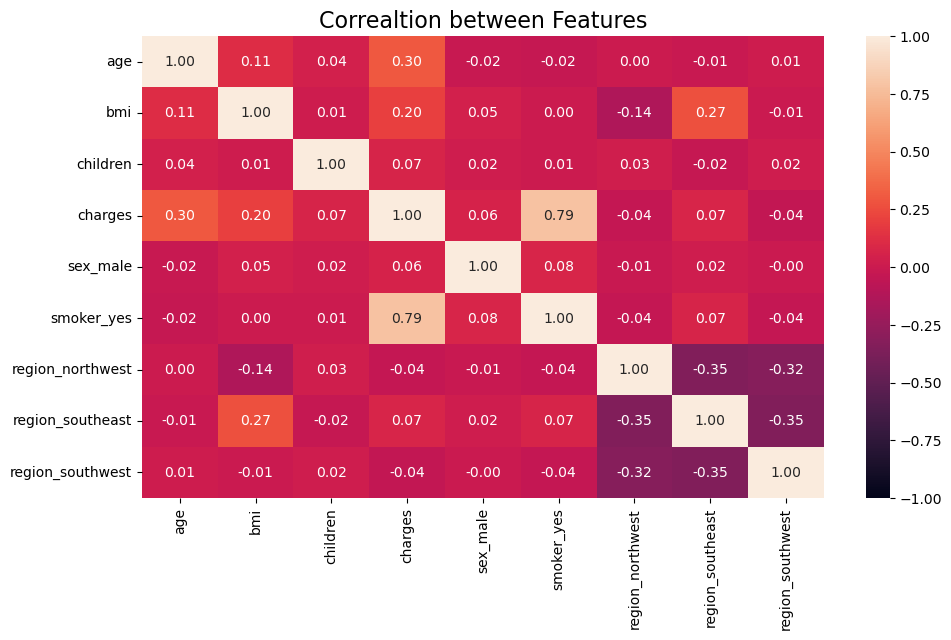

In [13]:
# creating a heatmap to visualize the correlation
plt.figure(figsize=(11,6))
sns.heatmap(cancer_df.corr(), annot = True, fmt = '.2f', vmin = -1, vmax = 1)
plt.title('Correaltion between Features', size = 16)
plt.show()

In [14]:
# droping 'sex_male' feature as it will not help in prediction of 'charges' or have high correlation with other features
cancer_df.drop('sex_male', axis = 1, inplace = True)

# verifying the changes made
cancer_df.head(2)

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1
1,18,33.77,1,1725.5523,0,0,1,0


**Question:** Compare the distribution of the number of children

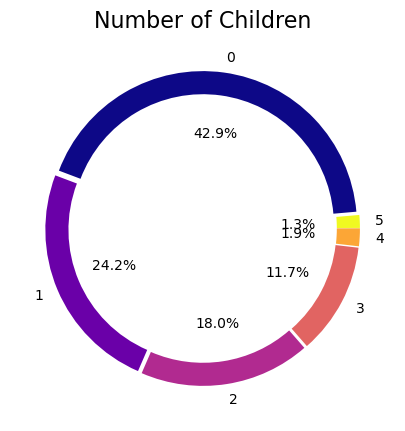

In [15]:
# creating a donut plot to visualize the distribution of children
fig = plt.figure(figsize=(11, 5))
space = np.ones(cancer_df['children'].nunique())/45
cancer_df['children'].value_counts().plot(kind = 'pie', explode = space,
                                          autopct = '%.1f%%', wedgeprops = dict(width = 0.15),
                                          startangle = 5, cmap = 'plasma')
plt.ylabel('')
plt.title('Number of Children', size = 16)
plt.show()

**Question:** Distribution of the dependent feature (charges)

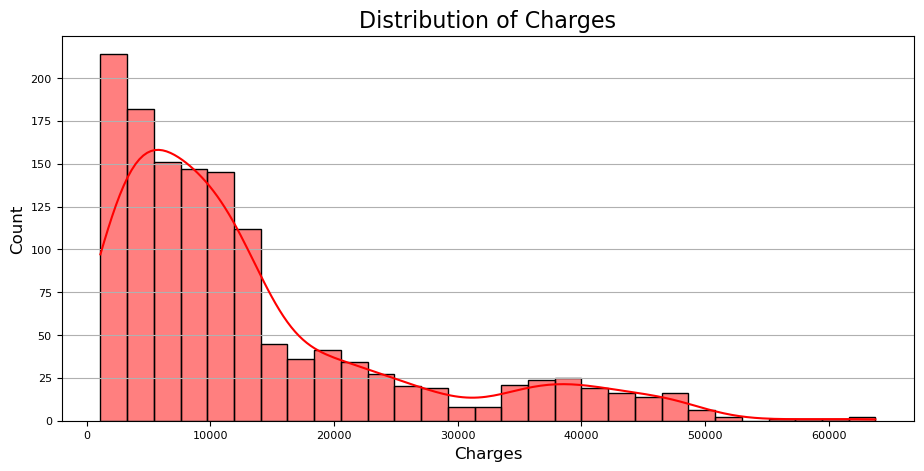

In [16]:
# creating a histplot to visualize the distribution of charges
fig = plt.figure(figsize = (11, 5))
sns.set_palette(['red'])
sns.histplot(cancer_df['charges'], kde = True)  
plt.xticks(size = 8)
plt.xlabel('Charges', size = 12)
plt.yticks(size = 8)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Charges', size = 16)
plt.grid(axis = 'y')
plt.show()

**Question:** Region wise customer distribution

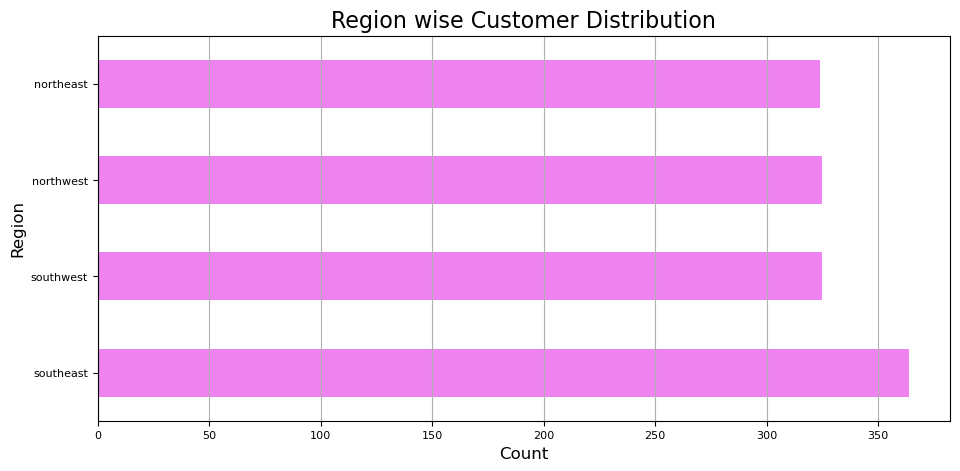

In [17]:
# creating a barplot to visualize customer distribution by region
fig = plt.figure(figsize = (11, 5))
cancer_df_original['region'].value_counts().plot.barh(color = 'violet')
plt.xticks(size = 8)
plt.xlabel('Count', size = 12)
plt.yticks(size = 8)
plt.ylabel('Region', size = 12)
plt.title('Region wise Customer Distribution', size = 16)
plt.grid(axis = 'x')
plt.show()

**Question:** Compare bmi and charges of medical bills

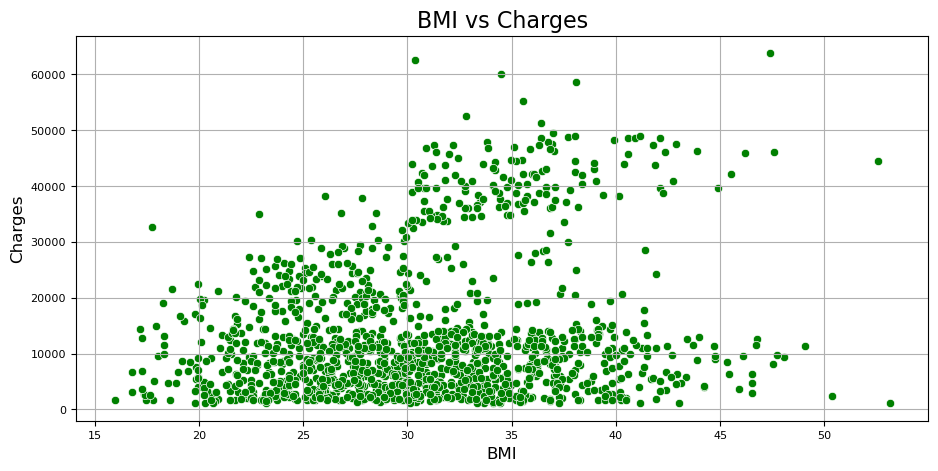

In [18]:
# creating a scatterplot to visualize bmi vs charges
fig = plt.figure(figsize = (11, 5))
sns.set_palette(['green'])
sns.scatterplot(cancer_df, x = 'bmi', y = 'charges')
plt.xticks(size = 8)
plt.xlabel('BMI', size = 12)
plt.yticks(size = 8)
plt.ylabel('Charges', size = 12)
plt.title('BMI vs Charges', size = 16)
plt.grid()
plt.show()

<a name = Section7></a>

---
# **7. Data Preparation**
---

In [19]:
# splitting the data as Inputs and Target
X = cancer_df.drop('charges', axis = 1)
y = cancer_df['charges']

In [20]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# checking the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 7)
(268, 7)
(1069,)
(268,)


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

In [21]:
# INSTANTIATE
model = LinearRegression()

# FIT
model.fit(X_train, y_train)

# PREDICT
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# calculating RMSE (Root Mean Squared Error)
rmse = mean_squared_error(y_pred = y_pred_test, y_true = y_test, squared = False)  

# calculating MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# calculating R-Square
r2_test = r2_score(y_test, y_pred_test) * 100
r2_train = r2_score(y_train, y_pred_train) * 100

print(f"RMSE = {rmse} | MAPE = {mape} | R2 Test Score = {r2_test} | R2 Train Score = {r2_train}")

RMSE = 5945.552150033019 | MAPE = 41.36968183304 | R2 Test Score = 80.76276254978129 | R2 Train Score = 72.98574614602522


In [22]:
# appling log transformation on the dependant features
cancer_df['charges'] = np.log1p(cancer_df['charges'])
cancer_df_ml = cancer_df.copy()
cancer_df_ml

,age,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,1,0,0,1
1,18,33.770,1,7.453882,0,0,1,0
2,28,33.000,3,8.400763,0,0,1,0
3,33,22.705,0,9.998137,0,1,0,0
4,32,28.880,0,8.260455,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268755,0,1,0,0
1334,18,31.920,0,7.699381,0,0,0,0
1335,18,36.850,0,7.396847,0,0,1,0
1336,21,25.800,0,7.605365,0,0,0,1


In [23]:
# scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# splitting the data as Inputs and Target
X = cancer_df_ml.drop('charges', axis = 1)
y = cancer_df_ml['charges']

In [25]:
# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# checking the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1069, 7)
(268, 7)
(1069,)
(268,)


In [26]:
# INSTANTIATE
model_scaled = LinearRegression()

# FIT
model_scaled.fit(X_train, y_train)

# PREDICT
y_pred_test_scaled = model_scaled.predict(X_test)
y_pred_train_scaled = model_scaled.predict(X_train)

# calculating RMSE (Root Mean Squared Error)
rmse_scaled = mean_squared_error(y_pred = y_pred_test_scaled, y_true = y_test, squared = False)  

# calculating MAPE (Mean Absolute Percentage Error)
mape_scaled = np.mean(np.abs((y_test - y_pred_test_scaled) / y_test)) * 100

# calculating R-Square
r2_test_scaled = r2_score(y_test, y_pred_test_scaled) * 100
r2_train_scaled = r2_score(y_train, y_pred_train_scaled) * 100

print(f"RMSE = {rmse_scaled} | MAPE = {mape_scaled} | R2 Test Score = {r2_test_scaled} | R2 Train Score = {r2_train_scaled}")

RMSE = 0.39811808369542756 | MAPE = 2.8936352902651987 | R2 Test Score = 82.91841013035848 | R2 Train Score = 74.77362681975947


<a name = Section9></a>

---
# **9. Conclusion**
---

- We have analyzed and understood the different features that can influence the charges of the Medical insurance.

- Smoker and age plays an important role in determining the charges of the Medical bills.

- We have also built a predictor to estimate the charges based on those influential variables.

- The model performs decently as shown by our evaluation metrics. However, as the data is less, getting more records can improve the model's performance.

- This can be useful for the Insurance companies to improve their overall profit.

- We can also use other regression techniques to compare the model performance.